In [ ]:
import json
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
with open("../data/arxiv_cs_ai.json") as f:
    papers = json.load(f)

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')
abstracts = [p['abstract'] for p in papers]
embeddings = model.encode(abstracts, batch_size=32, show_progress_bar=True)
embeddings = np.array(embeddings)
print(f"Embeddings shape: ", embeddings.shape)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

Embeddings shape:  (1000, 384)


In [10]:
query = "transformer architectures for natural language processing"
query_emb = model.encode([query])
cos_sims = cosine_similarity(query_emb, embeddings)[0]

# Get top 5 most similar papers
top_idx = np.argsort(-cos_sims)[:5]
for idx in top_idx:
    print(f"Score: {cos_sims[idx]:.3f}, Title: {papers[idx]['title']}")

Score: 0.546, Title: A Patient-Doctor-NLP-System to contest inequality for less privileged
Score: 0.470, Title: GPG: Generalized Policy Gradient Theorem for Transformer-based Policies
Score: 0.453, Title: SparseSwaps: Tractable LLM Pruning Mask Refinement at Scale
Score: 0.449, Title: LabelFusion: Learning to Fuse LLMs and Transformer Classifiers for Robust Text Classification
Score: 0.446, Title: Parallel Decoder Transformer: Model-Internal Parallel Decoding with Speculative Invariance via Note Conditioning


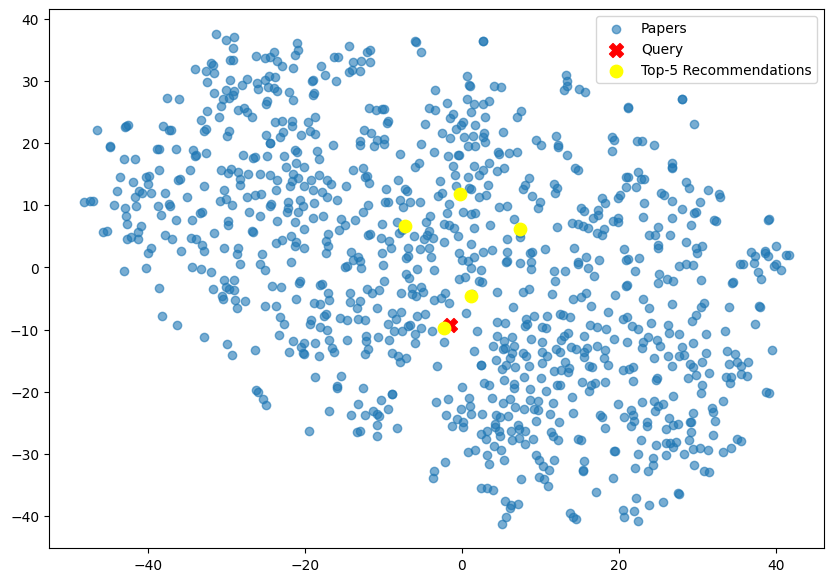

In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Stack query embedding with paper embeddings
all_embeddings = np.vstack([embeddings, query_emb])  # shape: (N+1, dim)

# Run t-SNE on everything at once
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1500,
    random_state=42
)
all_2d = tsne.fit_transform(all_embeddings)

# Split back
emb_2d = all_2d[:-1]   # paper embeddings
query_2d = all_2d[-1]  # query embedding

# Extract top-5 paper coordinates
top_2d = emb_2d[top_idx]

# Plot
plt.figure(figsize=(10,7))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.6, label='Papers')
plt.scatter(query_2d[0], query_2d[1], color='red', s=100, marker='X', label='Query')
plt.scatter(
    top_2d[:,0], top_2d[:,1],
    color='yellow',
    s=80,
    marker='o',
    label='Top-5 Recommendations'
)
plt.legend()
plt.show()

t-SNE visualisations are used for qualitative inspection only; recommendation quality is evaluated using cosine similarity in the original embedding space.